# Wczytanie potrzebnych bibliotek


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import requests

# Wczytanie danych z naszego API oraz konwersja na PandasDataFrame

In [2]:
df=requests.get("https://api.apispreadsheets.com/api/dataset/forest-fires/").json()
from pandas import json_normalize 
df = json_normalize(df, 'data')


# Sprawdźmy z jakich kolumn składa się nasz DataFrame

In [3]:
df.head(4)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


Jak możemy zauważyć, wszystkie nasze kolumny składają się z wartości nie wybrakowanych (non-null) oraz każda z kolumn ma ujednolicony typ danych 

# Sprawdzenie rozkładów poszczególnych wartości w kolumnach

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


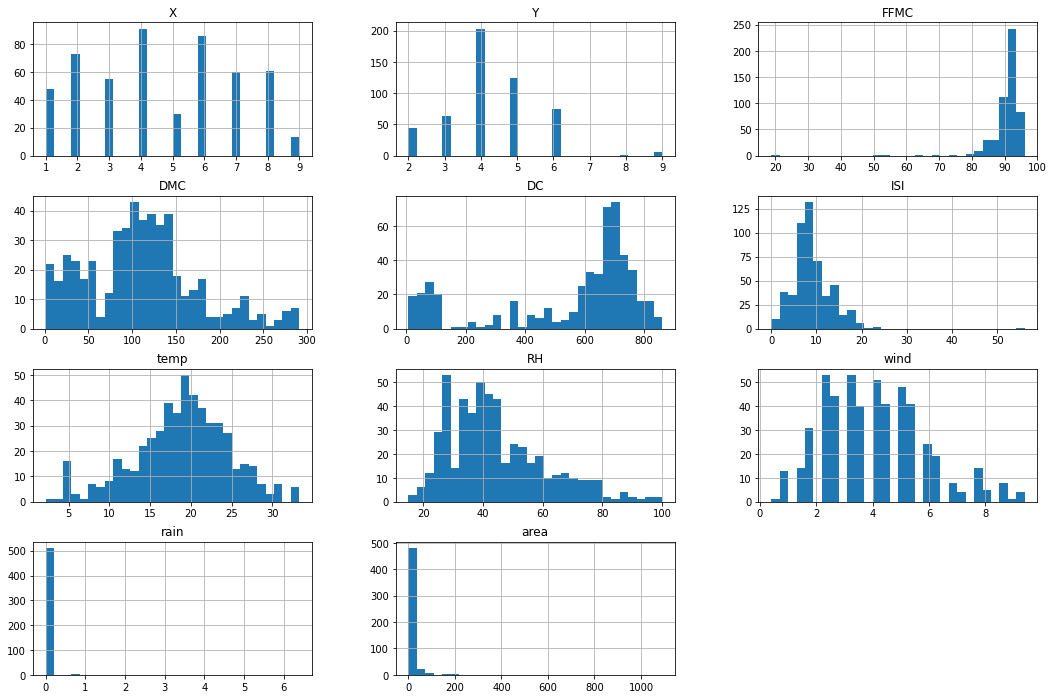

In [ ]:
df.hist(figsize=(18, 12), bins=30)
plt.show()

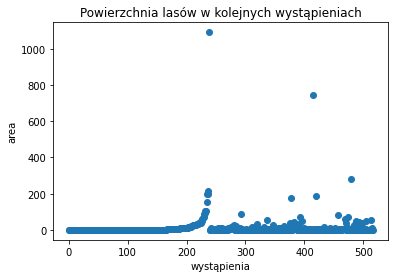

In [ ]:
plt.plot(df['area'], 'o')
plt.title('Powierzchnia która spłonęła w kolejnych wystąpieniach')
plt.xlabel('wystąpienia')
plt.ylabel('area')
plt.show()

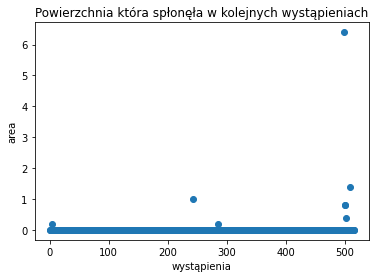

In [ ]:
plt.plot(df['rain'], 'o')
plt.title('Powierzchnia która spłonęła w kolejnych wystąpieniach')
plt.xlabel('wystąpienia')
plt.ylabel('area')
plt.show()

Text(0.5, 1.0, 'Area')

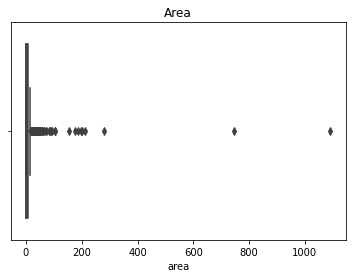

In [ ]:
box = sns.boxplot(df['area'])
box.set_title('Area')

Z naszych wizualizacji możemy zauważyć między innymi to, że:
* znacząca część lasów nie płonęła
* w lasach z naszej bazy danych rzadko kiedy padał deszcz


Zauważmy, że posiadamy koordynaty naszych lasów. Sprawdźmy więc, czy w naszych danych nie znajdziemy miejsca, w którym pożary lasów występują znacząco częściej niż w pozostałych

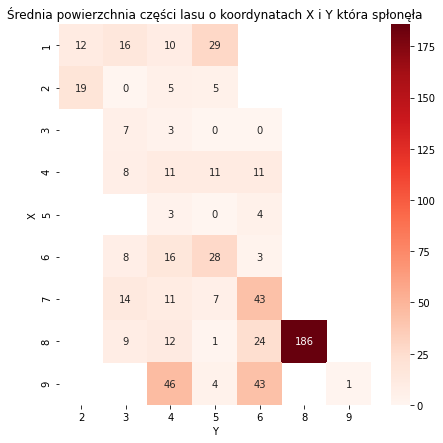

In [176]:
df_region_mean = df.groupby(["X","Y"])
df_region_mean = df_region_mean.mean().reset_index()
df_coordinate = df_region_mean.pivot("X", "Y", "area")
plt.figure(figsize=(7, 7))
sns.heatmap(df_coordinate, cmap="Reds", annot=True, fmt=".0f")
plt.title("Średnia powierzchnia części lasu o koordynatach X i Y która spłonęła")
plt.show()



Jak możemy zauważyć, Region X=8 Y=8 charakteryzuje się dosyć dużą liczbą pożarów

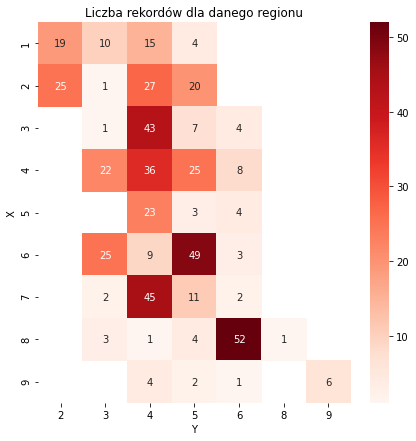

In [177]:
df_region_count = df.groupby(["X","Y"]).count().reset_index()
df_region_count
df_region_count = df_region_count.pivot("X", "Y", "area")
plt.figure(figsize=(7, 7))
sns.heatmap(df_region_count, cmap="Reds", annot=True, fmt=".0f")
plt.title("Liczba rekordów dla danego regionu")
plt.show()

In [179]:
df_88 = df[(df["X"] == 8) & (df["Y"] == 8)]
df_88

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
420,8,8,aug,wed,91.7,191.4,635.9,7.8,26.2,36.0,4.5,0.0,185.76


Zauważmy także, że dla danego regionu wykonano tylko jeden pomiar. Może to na przykład oznaczać, że dany region spłonął w większości/całości, więc dalsze pomiary nie mają dla niego już sensu

# Sprawdźmy zależności pomiędzy interesującą nas wartością area - części lasu która spłonęła, a pozostałymi zmiennymi.

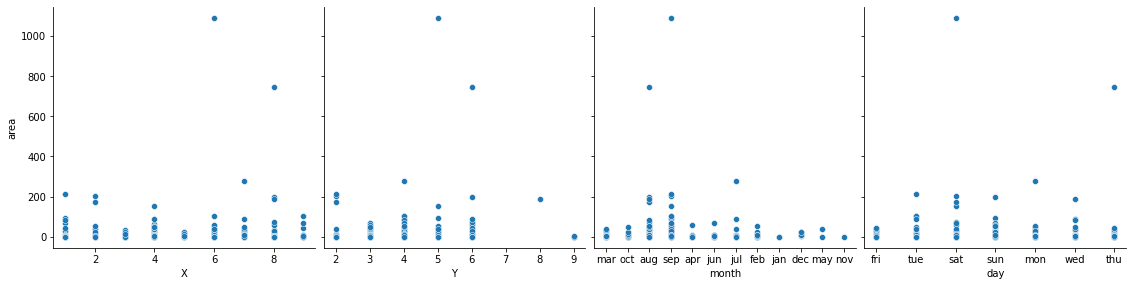

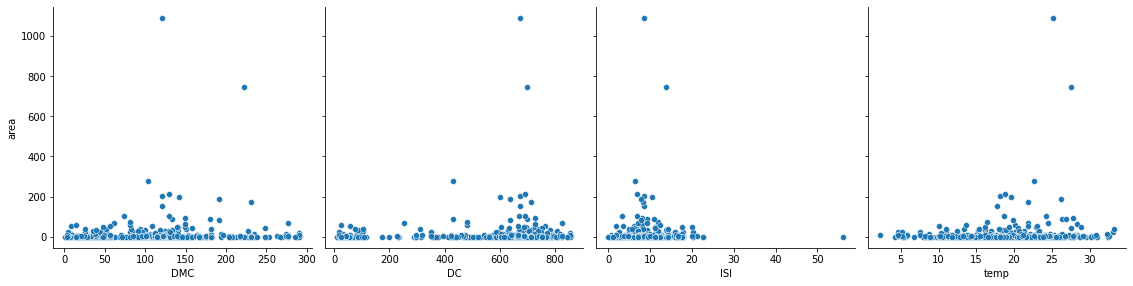

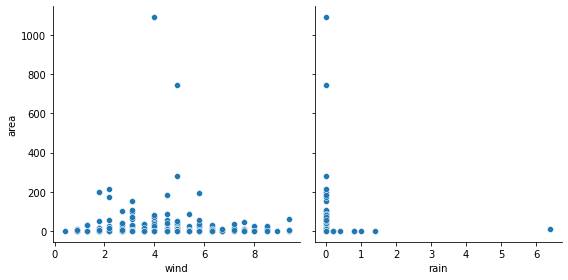

In [ ]:
cols = df.columns[0:12]
cols
sns.pairplot(df, x_vars=cols[0:4], y_vars ="area", height = 4, aspect = 1)
sns.pairplot(df, x_vars=cols[5:9], y_vars ="area", height = 4, aspect = 1)
sns.pairplot(df, x_vars=cols[10:12], y_vars ="area", height = 4, aspect = 1)
plt.tight_layout()

### Zauważmy, że nie tylko w regionie X=8 oraz Y=8 wystąpił bardzo duży pożar.  Sprawdźmy więc pozostałe miejsca, w których wystąpiły duże pożary (przyjmijmy górne 5%)

In [200]:
quantile = df.area.quantile(.95)
df_burned_areas = df[df["area"] > quantile]
df_burned_areas

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
226,7,5,oct,mon,91.7,48.5,696.1,11.1,16.1,44.0,4.0,0.0,49.37
227,8,6,aug,sat,92.2,81.8,480.8,11.9,20.1,34.0,4.5,0.0,58.30
228,4,6,sep,sun,93.5,149.3,728.6,8.1,28.3,26.0,3.1,0.0,64.10
229,8,6,aug,sat,92.2,81.8,480.8,11.9,16.4,43.0,4.0,0.0,71.30
230,4,4,sep,wed,92.9,133.3,699.6,9.2,26.4,21.0,4.5,0.0,88.49
231,1,5,sep,sun,93.5,149.3,728.6,8.1,27.8,27.0,3.1,0.0,95.18
232,6,4,sep,tue,91.0,129.5,692.6,7.0,18.7,43.0,2.7,0.0,103.39
233,9,4,sep,tue,84.4,73.4,671.9,3.2,24.3,36.0,3.1,0.0,105.66
234,4,5,sep,sat,92.5,121.1,674.4,8.6,17.7,25.0,3.1,0.0,154.88
235,8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41.0,5.8,0.0,196.48


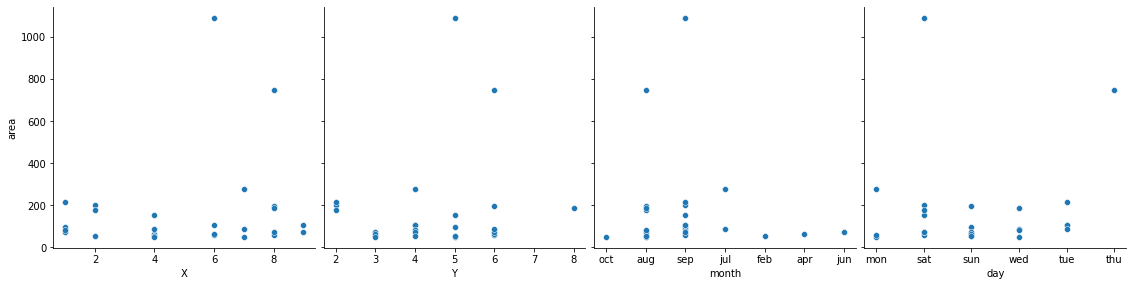

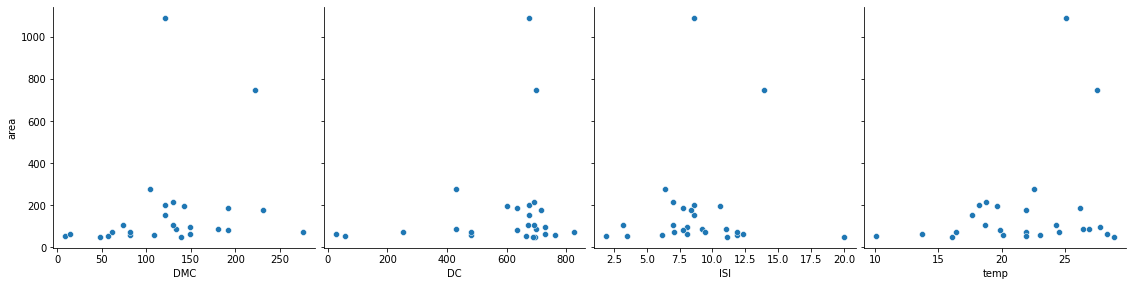

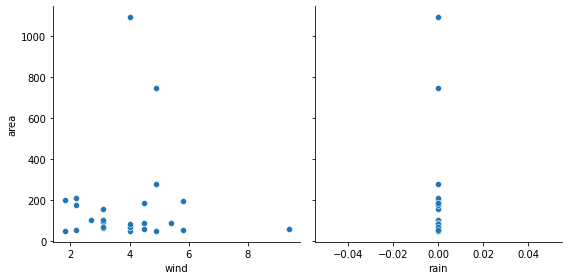

In [201]:
sns.pairplot(df_burned_areas, x_vars=cols[0:4], y_vars ="area", height = 4, aspect = 1)
sns.pairplot(df_burned_areas, x_vars=cols[5:9], y_vars ="area", height = 4, aspect = 1)
sns.pairplot(df_burned_areas, x_vars=cols[10:12], y_vars ="area", height = 4, aspect = 1)
plt.tight_layout()

In [260]:
df_burned_areas_count = df_burned_areas.groupby("month").count().reset_index()
df_burned_areas_count = df_burned_areas_count[["month", "X"]]
months = ["feb","apr", "jun", "jul", "aug", "sep", "oct"]
df_burned_areas_count

,month,X
0,apr,1
1,aug,9
2,feb,1
3,jul,2
4,jun,1
5,oct,1
6,sep,11


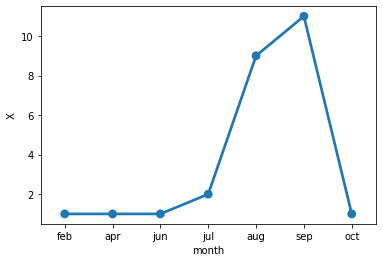

In [261]:
df_burned_areas_count["ind"] = ['b', 'e', 'a', 'd', 'c','g', 'f']
df_burned_areas_count = df_burned_areas_count.set_index("ind")
df_burned_areas_count.sort_index(inplace = True)  
sns.pointplot(x=df_burned_areas_count.month, y=df_burned_areas_count.X)

Dzięki naszym zależnością możemy zauważyć, że:
* większość dużych pożarów wystąpiła latem (Montesinho park leży w Portugalii, https://ibb.co/TmXD932)
* w dniu pożaru nie padał deszcz

Sprawdźmy, jak z eksploracją danych radzi sobie pandas profiling

In [266]:
pip install pandas-profiling[notebook]

     |████████████████████████████████| 112kB 5.5MB/s 
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5


In [12]:

from pandas_profiling import ProfileReport
profile = ProfileReport(df)
#profile.to_file(output_file = "report.html")
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Zdecydowanym ograniczeniem narzędzia jest fakt, że produkcja takiego raportu zajęła na moim komputerze średnio 30 sekund. Zauważmy, że nasze dane zawierają tylko 517 obserwacji. Mimo wszystko narzędzie w bardzo prosty sposób pozwala nam zeksplorować nasze dane i z pewnością warto z niego skorzystać w przypadku posiadania niewielkiego zbioru danych